# 1D FDM solution to stationary Schrodinger equation

## Theory

In quantum mechanics time dependent Schrodinger Equation allows to calculate wavefunctions of the system and investigate how they evolve in time. Mathematically it's a second order, linear PDE

$$
\hat H \psi (\vec r, t) = - i \hbar \frac{\partial}{\partial t} \psi (\vec r, t),
$$

where for a particle bounend in time-independent potential $V$, the system is described by hamiltonian

$$
\hat H = - \frac{\hbar ^2}{2m} \nabla ^2 + V(\vec r),
$$

Assuming a wavefunction to be in a product form of its time-independent part $\psi (\vec r)$ and time dependent part $ \phi (t)$ one can separate the time dependent SE into two equations:

$$
    \begin{cases}
         \left[ - \frac{\hbar ^2}{2m} \nabla ^2 + V(\vec r) \right] \psi (\vec r) = E \psi (\vec r), \\
         \phi (t) = \exp \left( - i \frac{Et}{\hbar} \right),
    \end{cases}\,
$$

where $ \psi (\vec r, t) =  \psi (\vec r) \phi (t)$, the first eq. is called 'stationary' SE, and the second one 


$$
\hat H = - \frac{\hbar ^2}{2m} \partial_x ^2 + V(x).
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x_min = -10
x_max = 10
N = 1001

h_bar = 1
m = 1

x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

const_1 = - h_bar ** 2 /(2 * m * h **2)

T = np.zeros((N-2, N-2), dtype=float)
V = np.zeros((N-2, N-2), dtype=float)



def V_func(x):
    k = 1
    return k * x ** 2

In [3]:
for i in range(N-2):
    T[i, i] = -2
    
for i in range(N-3):
    T[i+1, i] = 1
    T[i, i+1] = 1

T = const_1 * T
    
for i in range(N-2):
    V[i, i] = V_func(x[i+1])


Now we construct the full hamiltonian matrix:

$$
\hat T = -\frac{\hbar ^2}{2 m h^2}
\begin{bmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots &  \ddots  & 1 \\
0 & 0 & 0 & 1 & -2 
\end{bmatrix}
$$

$$
\hat V = 
\begin{bmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \dots & 0 \\
0 & 0 & V_3 & \dots & 0 \\
\vdots & \vdots & \vdots &  \ddots  & 0 \\
0 & 0 & 0 & 0 & V_{N-1}
\end{bmatrix} 
$$


In [4]:
H = T + V

$$
\hat H \vec \psi = E_n \vec \psi, \space n = \{1, 2, \dots, N-1\},
$$

where $\vec \psi $ is a vector containing all the discretized wavefunctions, that have the corresponding energy eigenvalue $E_n$. We solve this eigenvalue problem by using built-in *numpy* function *linalg.eig()* :

In [5]:
def eigen(matrix):
    eigen_vals, eigen_vectors = np.linalg.eigh(matrix)
    idx = np.argsort(eigen_vals)
    eigen_vals = eigen_vals[idx]
    eigen_vectors = eigen_vectors[:,idx]
    return (eigen_vals, eigen_vectors)

energies, psi = eigen(H)

energies = energies / energies.min()

# According to analytical solution of SE for 1D quantum harmonic oscillator the corresponding energy levels are

$$
E_n = {\hbar} \omega \left(n + \frac{1}{2} \right) 
$$

This proportionality is true as long as potential is a non-negative, quadratic form of position.

In [46]:
def normalize(psi, x, h):
    psi_squared = psi ** 2
    integ = np.trapz(psi_squared, x, h)
    norm = np.sqrt(integ)
    return psi / norm


#here we create a 2d ndarray of |psi|^2 

probabilities = []

for i in range(len(psi)):
    probabilities.append(normalize(psi[:, i], x[1:-1], h) ** 2)




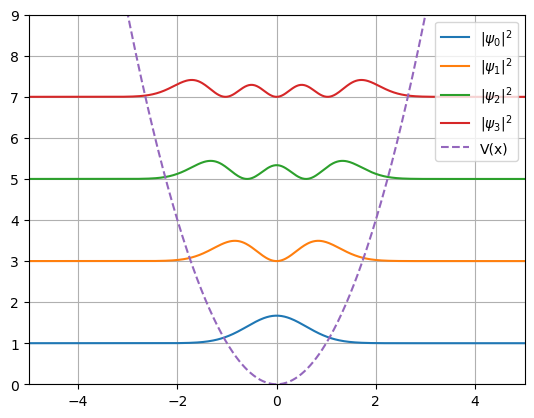

In [56]:
pot = V_func(x)

for k in range(4):
    wave = probabilities[k]  + energies[k]
    plt.plot(x[1:-1], wave, label = f'$|\psi_{k}|^2$')
    
plt.xlim(-5,5)
plt.ylim(0, 9)
plt.plot(x[1:-1], pot[1:-1], '--', label = 'V(x)')

plt.legend()
plt.grid()    
plt.show()
    